In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

In [ ]:
print("\nLOAD DỮ LIỆU")

df = pd.read_csv('../data/processed/featured_data.csv')
print(f"✓ Đã load dữ liệu: {df.shape[0]:,} dòng, {df.shape[1]} cột")


LOAD DỮ LIỆU
✓ Đã load dữ liệu: 75,897 dòng, 52 cột


# PHÂN TÍCH SỰ PHÂN BỔ VIỆC LÀM

# Phân bổ theo thành phố


Phân bổ việc làm theo thành phố (Top 10):
city
Hà Nội         24497
Hồ Chí Minh    23911
Bình Dương      3714
Đồng Nai        2387
Long An         1543
Hải Phòng       1490
Đà Nẵng         1208
Hưng Yên        1038
Bắc Ninh         982
Tây Ninh         711
Name: count, dtype: int64


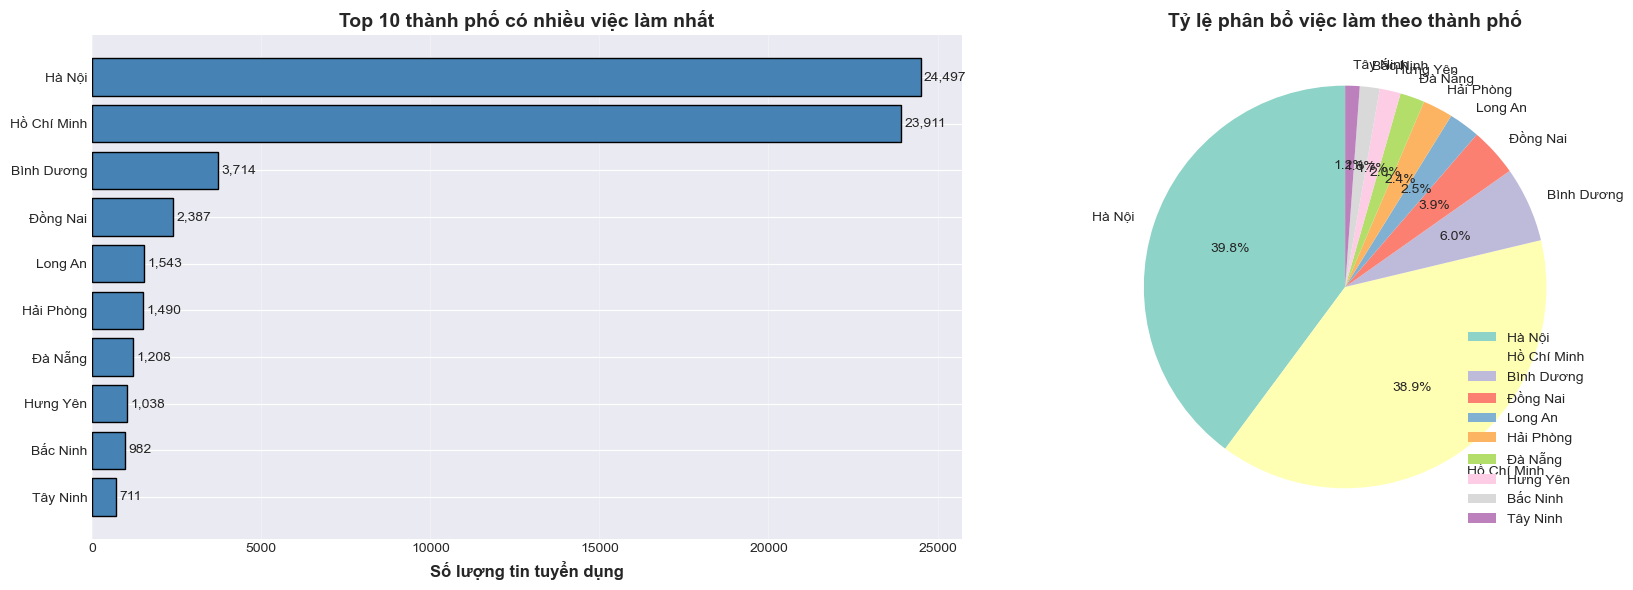

Đã lưu biểu đồ phân bổ theo thành phố!


In [ ]:
print("\nPhân bổ việc làm theo thành phố (Top 10):")

city_counts = df['city'].value_counts().head(10)
print(city_counts)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Biểu đồ cột ngang
axes[0].barh(city_counts.index, city_counts.values, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Số lượng tin tuyển dụng', fontsize=12, fontweight='bold')
axes[0].set_title('Top 10 thành phố có nhiều việc làm nhất', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()
# Thêm số liệu lên cột
for i, (idx, value) in enumerate(city_counts.items()):
    axes[0].text(value + 100, i, f'{value:,}', va='center', fontsize=10)

# Biểu đồ tròn
colors = plt.cm.Set3(range(len(city_counts)))
axes[1].pie(city_counts.values, labels=city_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 10})
axes[1].set_title('Tỷ lệ phân bổ việc làm theo thành phố', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('./figures/04_city_distribution.png', dpi=300, bbox_inches='tight')
plt.legend()
plt.show()
print("Đã lưu biểu đồ phân bổ theo thành phố!")

# Phân bổ theo cấp bậc


Phân bổ việc làm theo cấp bậc:
position_level
Nhân viên        65007
Quản lý           3316
Trưởng phòng      2819
Trưởng nhóm       2504
Thực tập sinh     1669
Cộng tác viên      237
Giám đốc           206
Chuyên gia         100
Phó giám đốc        34
Chưa cập nhật        5
Name: count, dtype: int64


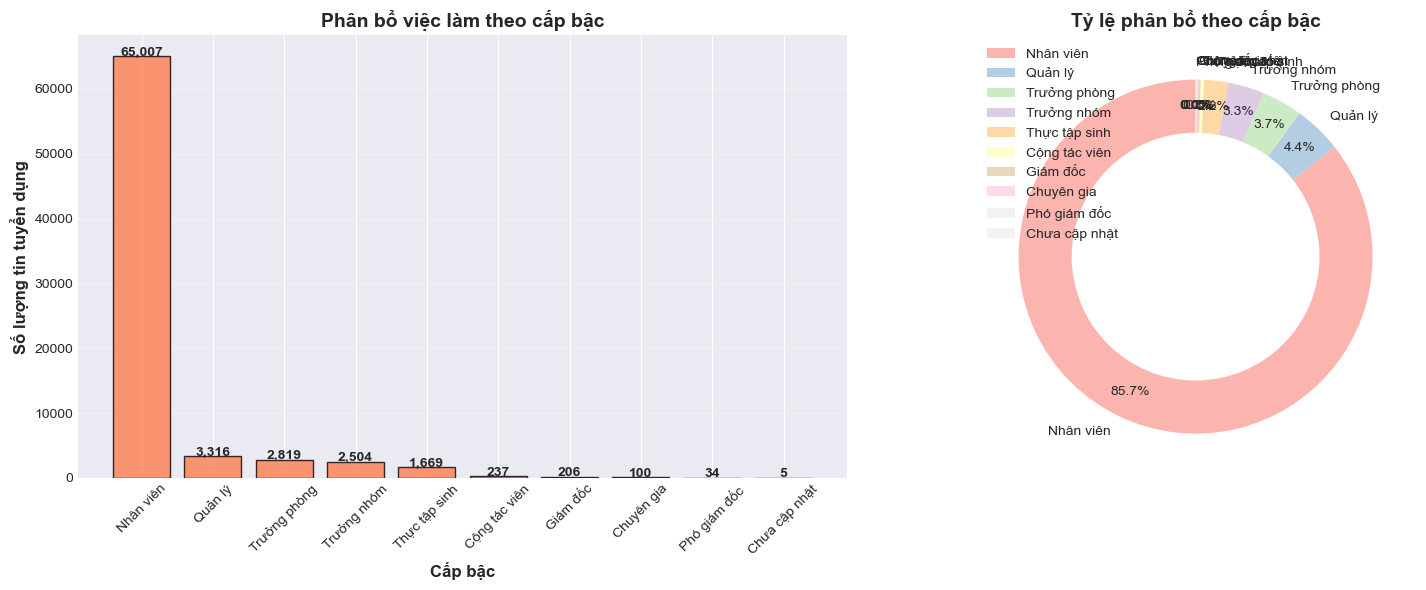

Đã lưu biểu đồ phân bổ theo cấp bậc!


In [ ]:
print("\nPhân bổ việc làm theo cấp bậc:")

position_counts = df['position_level'].value_counts()
print(position_counts)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ cột
axes[0].bar(position_counts.index, position_counts.values, color='coral', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Cấp bậc', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Số lượng tin tuyển dụng', fontsize=12, fontweight='bold')
axes[0].set_title('Phân bổ việc làm theo cấp bậc', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)
# Thêm số liệu lên cột
for i, (idx, value) in enumerate(position_counts.items()):
    axes[0].text(i, value + 100, f'{value:,}', ha='center', fontsize=10, fontweight='bold')

# Biểu đồ donut
colors = plt.cm.Pastel1(range(len(position_counts)))
wedges, texts, autotexts = axes[1].pie(position_counts.values, labels=position_counts.index,
                                         autopct='%1.1f%%', colors=colors, startangle=90,
                                         pctdistance=0.85, textprops={'fontsize': 10})
# Tạo donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[1].add_artist(centre_circle)
axes[1].set_title('Tỷ lệ phân bổ theo cấp bậc', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('./figures/04_position_distribution.png', dpi=300, bbox_inches='tight')
plt.legend()
plt.show()
print("Đã lưu biểu đồ phân bổ theo cấp bậc!")

# Top 10 lĩnh vực


Top 10 lĩnh vực có nhiều tin tuyển dụng nhất:
kinh doanh               21697
bán hàng                 21697
chăm sóc khách hàng      11345
marketing                 7525
ngân hàng                 7407
bán hàng - kinh doanh     6811
Chưa phân loại            6484
kế toán                   6387
tài chính                 6385
kiểm toán                 5852
Name: count, dtype: int64


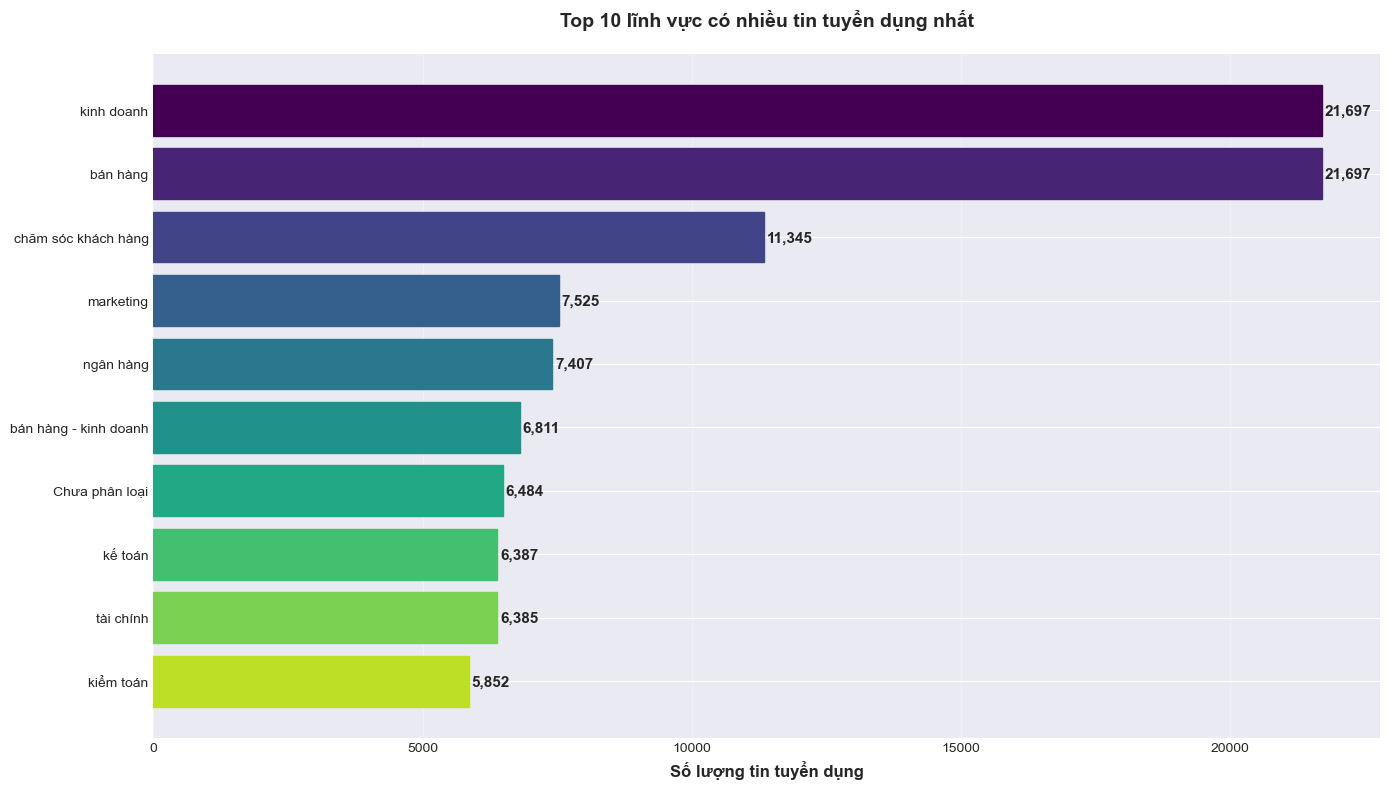

Đã lưu biểu đồ phân bổ theo lĩnh vực!


In [ ]:
print("\nTop 10 lĩnh vực có nhiều tin tuyển dụng nhất:")

# Trích xuất tất cả lĩnh vực
all_fields = []
for fields in df['job_fields'].dropna():
    fields_list = [f.strip() for f in str(fields).split(',')]
    all_fields.extend(fields_list)

fields_counts = pd.Series(all_fields).value_counts().head(10)
print(fields_counts)

plt.figure(figsize=(14, 8))
bars = plt.barh(fields_counts.index, fields_counts.values, color='mediumseagreen', edgecolor='black')
plt.xlabel('Số lượng tin tuyển dụng', fontsize=12, fontweight='bold')
plt.title('Top 10 lĩnh vực có nhiều tin tuyển dụng nhất', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)

# Thêm số liệu và màu gradient
for i, (bar, value) in enumerate(zip(bars, fields_counts.values)):
    bar.set_color(plt.cm.viridis(i / len(fields_counts)))
    plt.text(value + 50, i, f'{value:,}', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('./figures/04_fields_distribution.png', dpi=300, bbox_inches='tight')
plt.gca().invert_yaxis()
plt.show()
print("Đã lưu biểu đồ phân bổ theo lĩnh vực!")

# PHÂN TÍCH XU HƯỚNG MỨC LƯƠNG

# Phân phối tổng quát của lương


Phân phối tổng quát của lương:


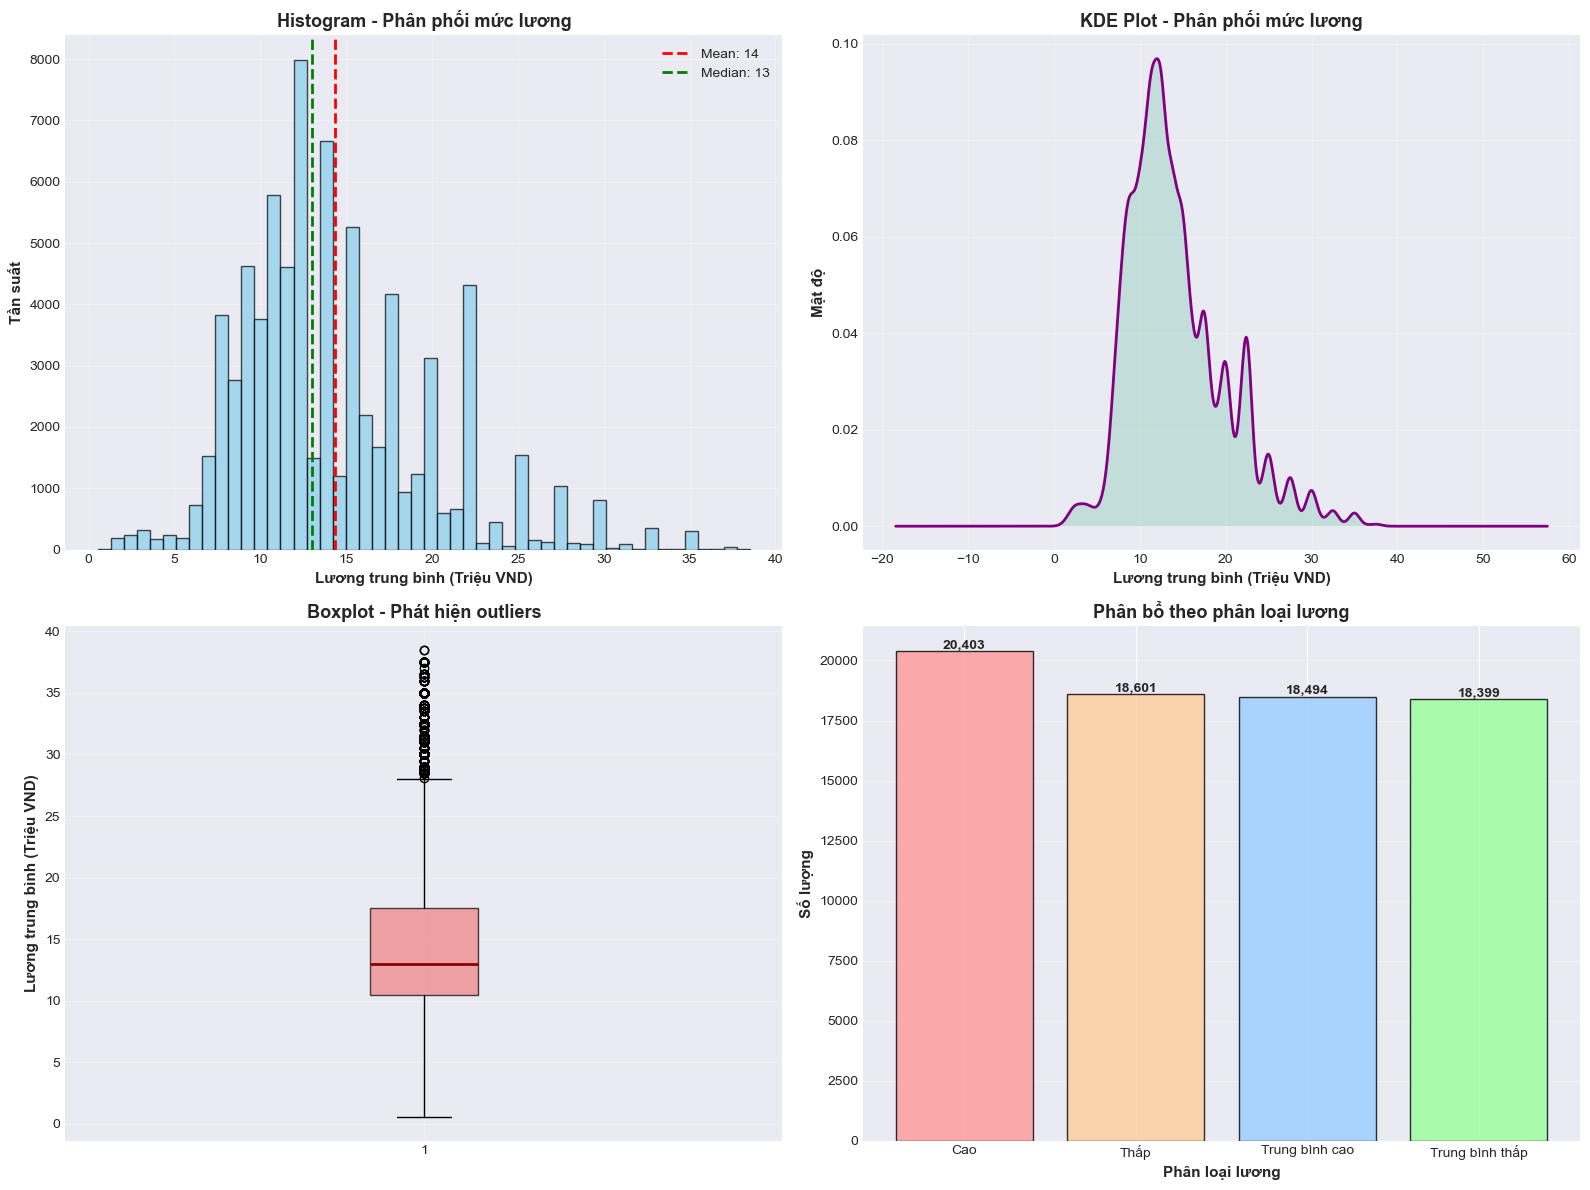

Đã lưu biểu đồ phân phối lương!


In [ ]:
print("\nPhân phối tổng quát của lương:")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
axes[0, 0].hist(df['salary_avg_vnd'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['salary_avg_vnd'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["salary_avg_vnd"].mean():,.0f}')
axes[0, 0].axvline(df['salary_avg_vnd'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["salary_avg_vnd"].median():,.0f}')
axes[0, 0].set_xlabel('Lương trung bình (Triệu VND)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Tần suất', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Histogram - Phân phối mức lương', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# KDE Plot
df['salary_avg_vnd'].plot(kind='kde', ax=axes[0, 1], color='purple', linewidth=2)
axes[0, 1].set_xlabel('Lương trung bình (Triệu VND)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Mật độ', fontsize=11, fontweight='bold')
axes[0, 1].set_title('KDE Plot - Phân phối mức lương', fontsize=13, fontweight='bold')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].fill_between(axes[0, 1].lines[0].get_xdata(), axes[0, 1].lines[0].get_ydata(), alpha=0.3)

# Boxplot
axes[1, 0].boxplot(df['salary_avg_vnd'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightcoral', alpha=0.7),
                   medianprops=dict(color='darkred', linewidth=2))
axes[1, 0].set_ylabel('Lương trung bình (Triệu VND)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Boxplot - Phát hiện outliers', fontsize=13, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Phân bổ theo category
salary_cat_counts = df['salary_category'].value_counts()
colors_cat = ['#ff9999', '#ffcc99', '#99ccff', '#99ff99']
axes[1, 1].bar(salary_cat_counts.index, salary_cat_counts.values, color=colors_cat, edgecolor='black', alpha=0.8)
axes[1, 1].set_xlabel('Phân loại lương', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Số lượng', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Phân bổ theo phân loại lương', fontsize=13, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, (idx, value) in enumerate(salary_cat_counts.items()):
    axes[1, 1].text(i, value + 100, f'{value:,}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('./figures/04_salary_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Đã lưu biểu đồ phân phối lương!")

# So sánh lương theo thành phố (Top 10)


So sánh lương theo thành phố:


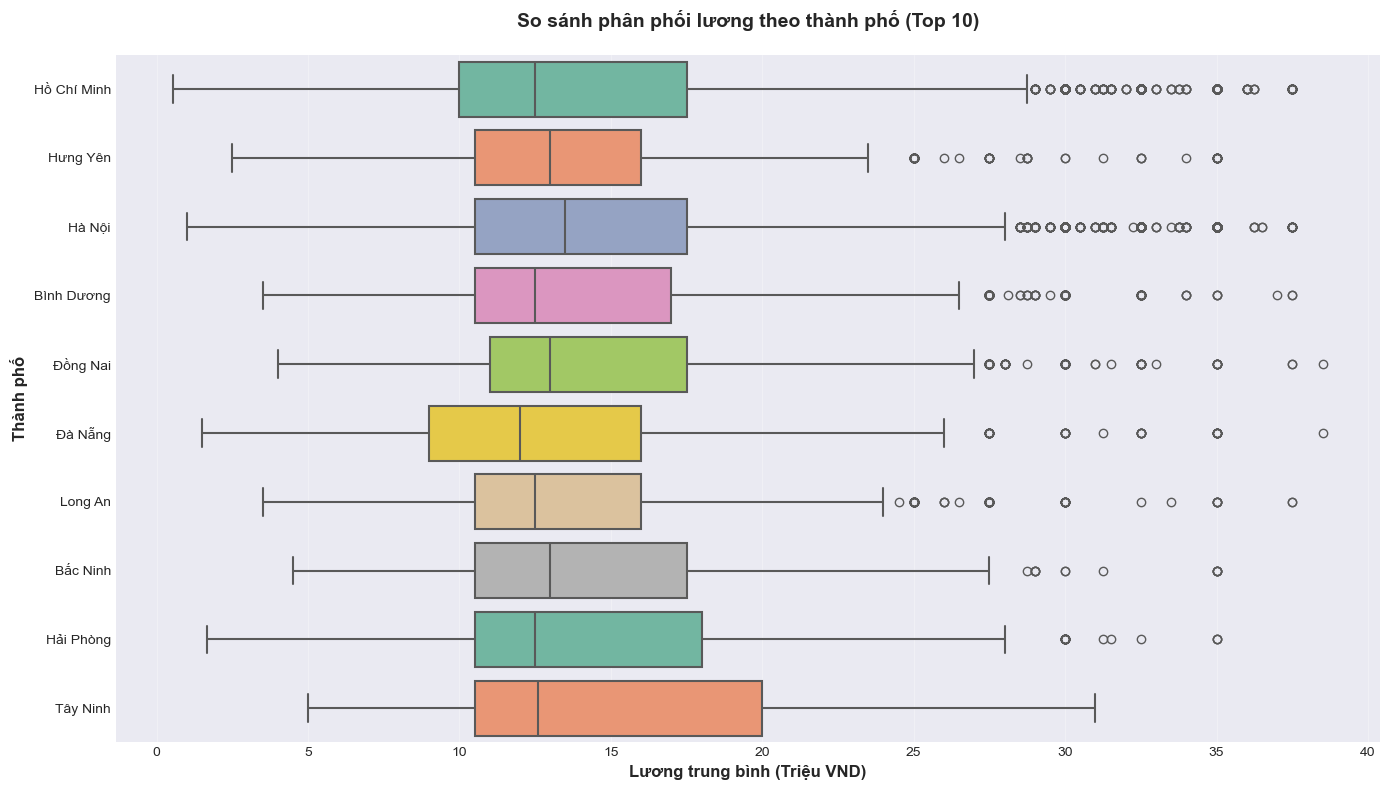

Đã lưu biểu đồ lương theo thành phố!


In [ ]:

print("\nSo sánh lương theo thành phố:")

top_cities = df['city'].value_counts().head(10).index
df_top_cities = df[df['city'].isin(top_cities)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top_cities, x='salary_avg_vnd', y='city', 
            palette='Set2', linewidth=1.5)
plt.xlabel('Lương trung bình (Triệu VND)', fontsize=12, fontweight='bold')
plt.ylabel('Thành phố', fontsize=12, fontweight='bold')
plt.title('So sánh phân phối lương theo thành phố (Top 10)', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('./figures/04_salary_by_city.png', dpi=300, bbox_inches='tight')
plt.show()
print("Đã lưu biểu đồ lương theo thành phố!")

# So sánh lương theo cấp bậc


So sánh lương theo cấp bậc:


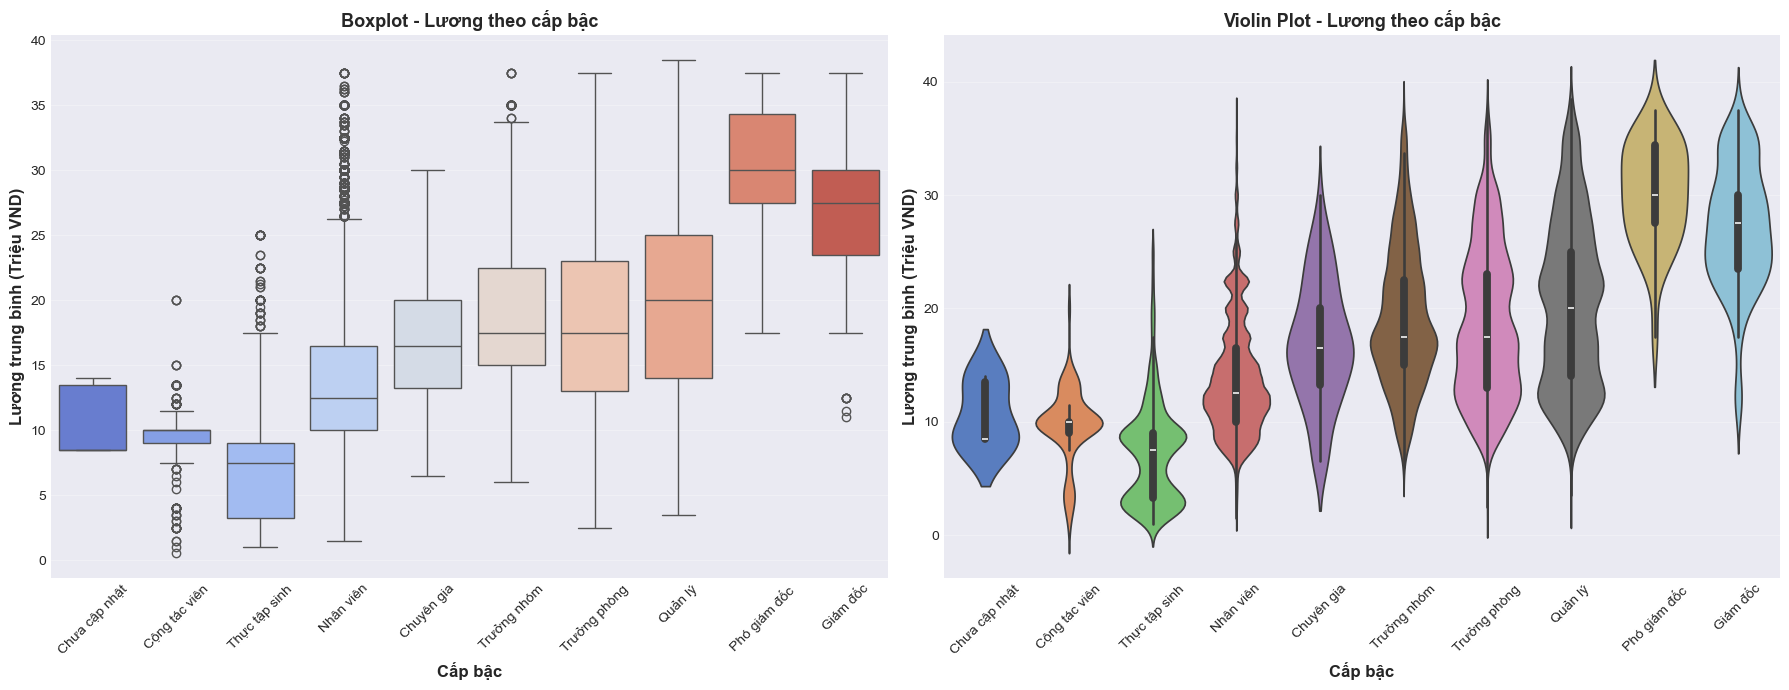

Đã lưu biểu đồ lương theo cấp bậc!


In [ ]:
print("\nSo sánh lương theo cấp bậc:")

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Boxplot
order = ['Chưa cập nhật','Cộng tác viên','Thực tập sinh', 'Nhân viên','Chuyên gia', 'Trưởng nhóm','Trưởng phòng', 'Quản lý', 'Phó giám đốc', 'Giám đốc']
existing_order = [pos for pos in order if pos in df['position_level'].unique()]

sns.boxplot(data=df, x='position_level', y='salary_avg_vnd', 
            order=existing_order, palette='coolwarm', ax=axes[0])
axes[0].set_xlabel('Cấp bậc', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Lương trung bình (Triệu VND)', fontsize=12, fontweight='bold')
axes[0].set_title('Boxplot - Lương theo cấp bậc', fontsize=13, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Violin plot
sns.violinplot(data=df, x='position_level', y='salary_avg_vnd', 
               order=existing_order, palette='muted', ax=axes[1])
axes[1].set_xlabel('Cấp bậc', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Lương trung bình (Triệu VND)', fontsize=12, fontweight='bold')
axes[1].set_title('Violin Plot - Lương theo cấp bậc', fontsize=13, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('./figures/04_salary_by_position.png', dpi=300, bbox_inches='tight')
plt.show()
print("Đã lưu biểu đồ lương theo cấp bậc!")

# So sánh lương theo lĩnh vực (Top 10)


So sánh lương theo lĩnh vực (Top 10):


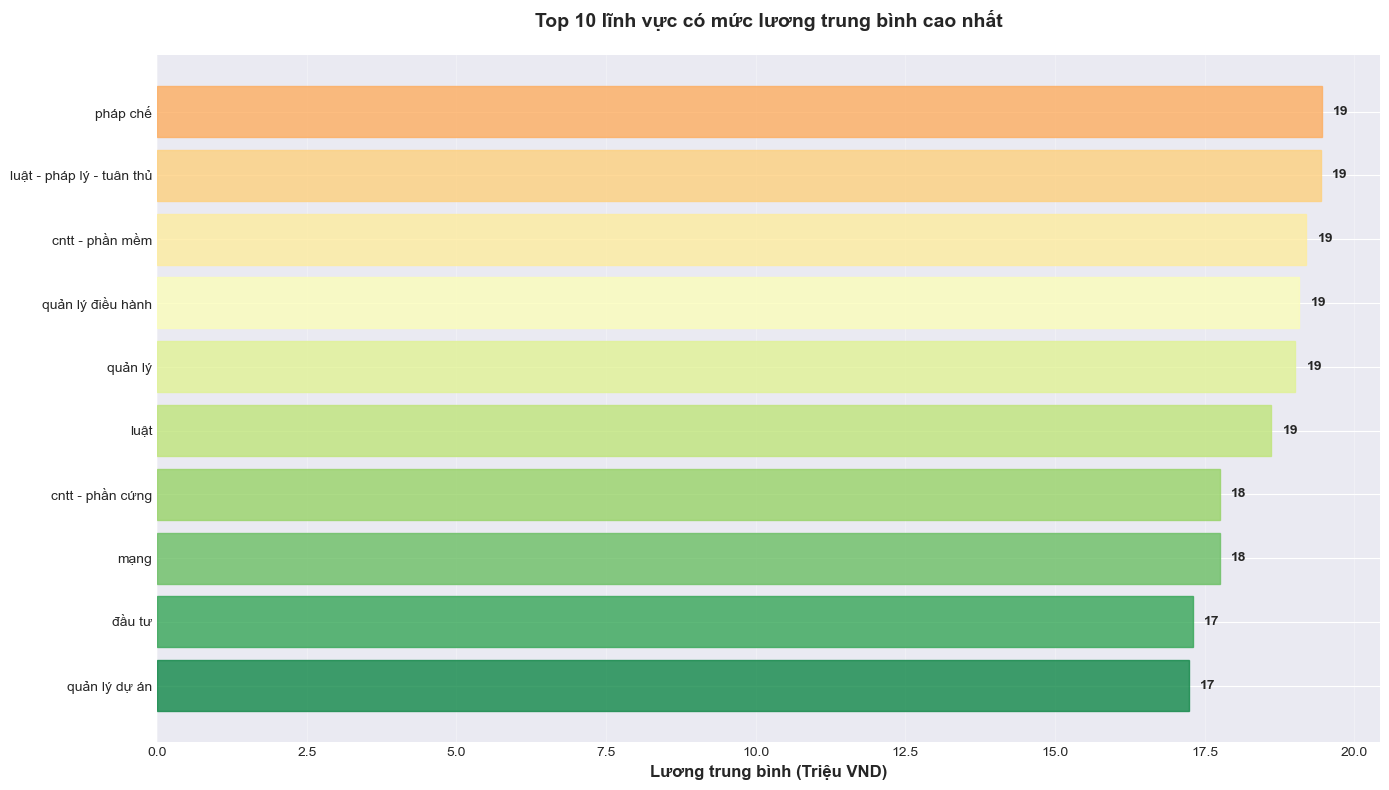

Đã lưu biểu đồ lương theo lĩnh vực!


In [ ]:
print("\nSo sánh lương theo lĩnh vực (Top 10):")

# Tính lương trung bình cho mỗi lĩnh vực
field_salary = {}
for idx, row in df.iterrows():
    fields = str(row['job_fields']).split(',')
    salary = row['salary_avg_vnd']
    for field in fields:
        field = field.strip()
        if field not in field_salary:
            field_salary[field] = []
        field_salary[field].append(salary)

# Tính mean cho mỗi lĩnh vực
field_avg_salary = {k: np.mean(v) for k, v in field_salary.items() if len(v) >= 100}
field_avg_salary = dict(sorted(field_avg_salary.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(14, 8))
bars = plt.barh(list(field_avg_salary.keys()), list(field_avg_salary.values()), 
                color='teal', edgecolor='black', alpha=0.8)
plt.xlabel('Lương trung bình (Triệu VND)', fontsize=12, fontweight='bold')
plt.title('Top 10 lĩnh vực có mức lương trung bình cao nhất', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)

# Gradient màu và số liệu
for i, (bar, value) in enumerate(zip(bars, field_avg_salary.values())):
    bar.set_color(plt.cm.RdYlGn(0.3 + i * 0.07))
    plt.text(value * 1.01, i, f'{value:,.0f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('./figures/04_salary_by_field.png', dpi=300, bbox_inches='tight')
plt.gca().invert_yaxis()
plt.show()
print("Đã lưu biểu đồ lương theo lĩnh vực!")

# PHÂN TÍCH YÊU CẦU VỀ KỸ NĂNG VÀ KINH NGHIỆM

# Word Cloud cho kỹ năng


Tạo Word Cloud cho kỹ năng phổ biến:


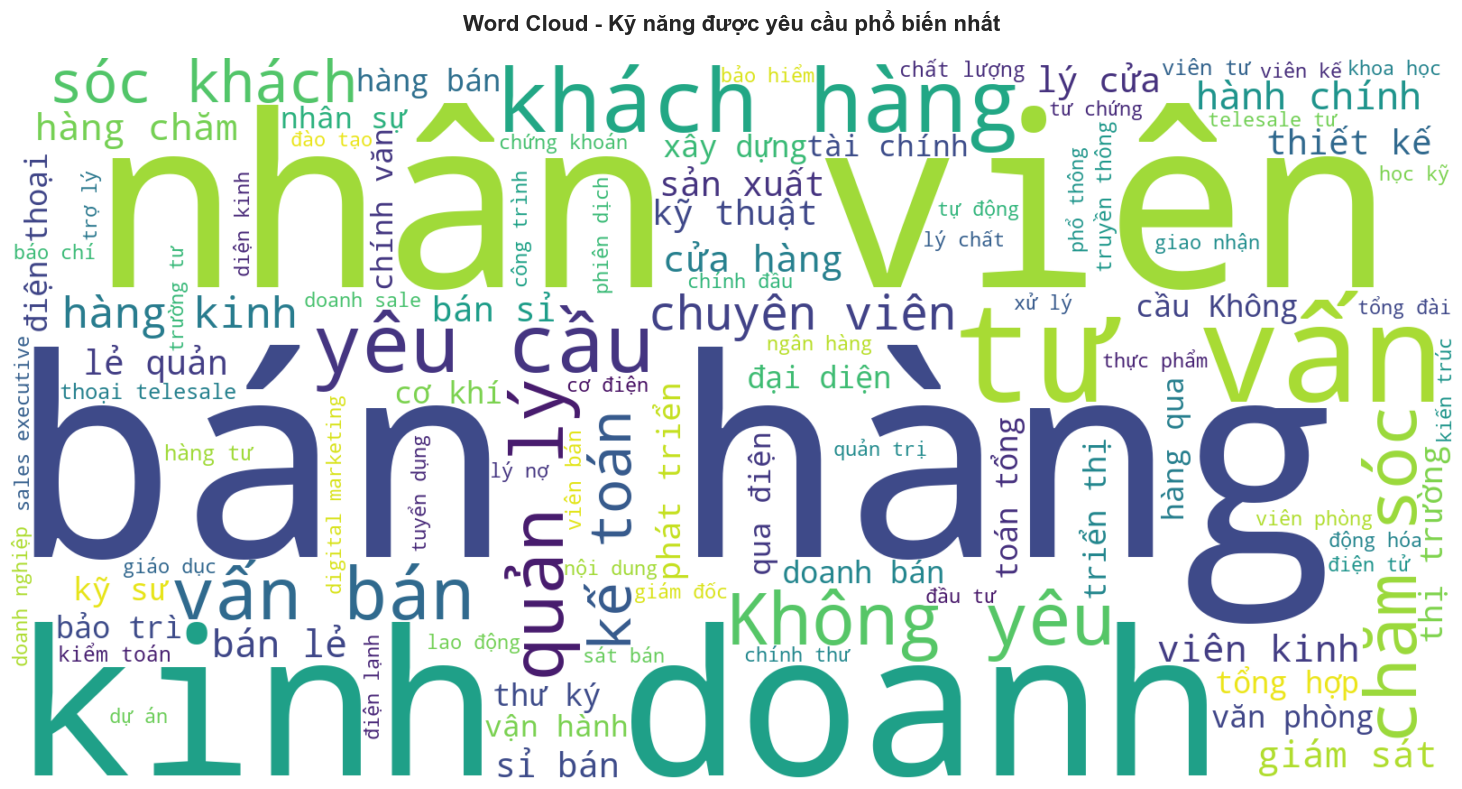

Đã lưu word cloud kỹ năng!


In [ ]:
print("\nTạo Word Cloud cho kỹ năng phổ biến:")

all_skills_text = ' '.join(df['skills'].dropna().astype(str))

wordcloud = WordCloud(width=1600, height=800, 
                      background_color='white',
                      colormap='viridis',
                      max_words=100,
                      relative_scaling=0.5).generate(all_skills_text)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Kỹ năng được yêu cầu phổ biến nhất', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('./figures/04_skills_wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()
print("Đã lưu word cloud kỹ năng!")

In [ ]:
# Top 20 kỹ năng phổ biến


Top 20 kỹ năng phổ biến nhất:
tư vấn bán hàng                       10156
Không yêu cầu                         10146
chăm sóc khách hàng                    8750
bán hàng kinh doanh                    6842
bán sỉ bán lẻ quản lý cửa hàng         3799
phát triển thị trường                  2546
bán hàng qua điện thoại (telesale)     2338
kế toán tổng hợp                       2330
hành chính văn phòng                   2260
xây dựng                               1873
kiểm toán                              1808
kế toán                                1550
hành chính thư ký                      1532
nhân viên kinh doanh                   1467
tài chính đầu tư chứng khoán           1459
cơ khí                                 1453
khoa học kỹ thuật                      1449
salesman                               1355
xử lý nợ                               1309
đại diện bán hàng                      1294
Name: count, dtype: int64


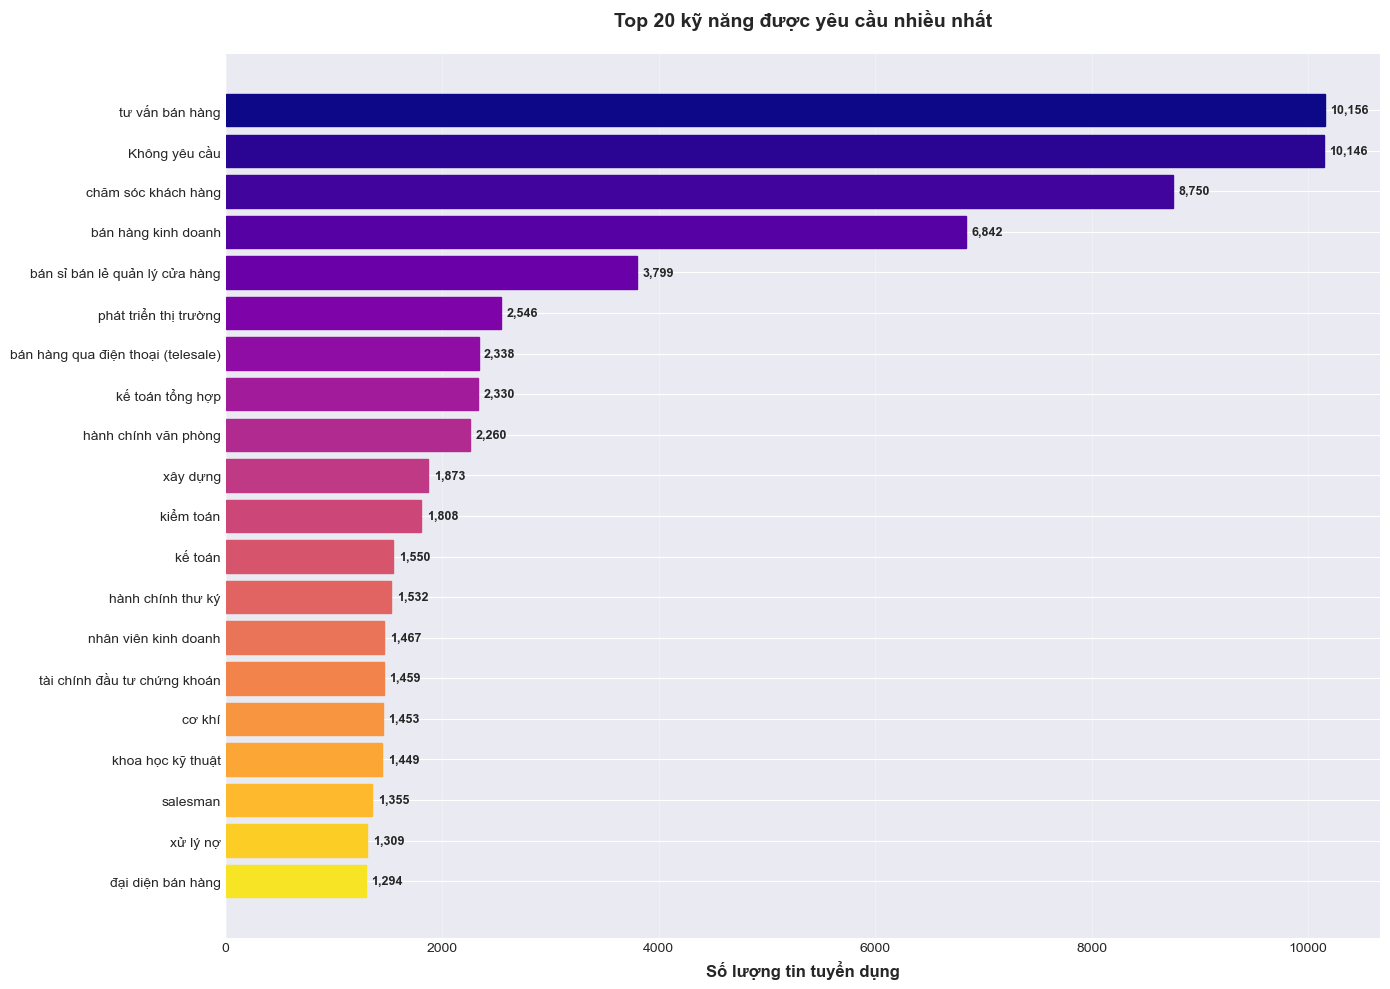

Đã lưu biểu đồ top skills!


In [ ]:
print("\nTop 20 kỹ năng phổ biến nhất:")

all_skills_list = []
for skills in df['skills'].dropna():
    skills_list = [s.strip() for s in str(skills).split(',')]
    all_skills_list.extend(skills_list)

skills_counts = pd.Series(all_skills_list).value_counts().head(20)
print(skills_counts)

plt.figure(figsize=(14, 10))
bars = plt.barh(skills_counts.index, skills_counts.values, color='mediumpurple', edgecolor='black')
plt.xlabel('Số lượng tin tuyển dụng', fontsize=12, fontweight='bold')
plt.title('Top 20 kỹ năng được yêu cầu nhiều nhất', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)

# Gradient và số liệu
for i, (bar, value) in enumerate(zip(bars, skills_counts.values)):
    bar.set_color(plt.cm.plasma(i / len(skills_counts)))
    plt.text(value + 50, i, f'{value:,}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('./figures/04_top_skills.png', dpi=300, bbox_inches='tight')
plt.gca().invert_yaxis()
plt.show()
print("Đã lưu biểu đồ top skills!")

# Mối quan hệ kinh nghiệm vs lương


Mối quan hệ giữa kinh nghiệm và lương:


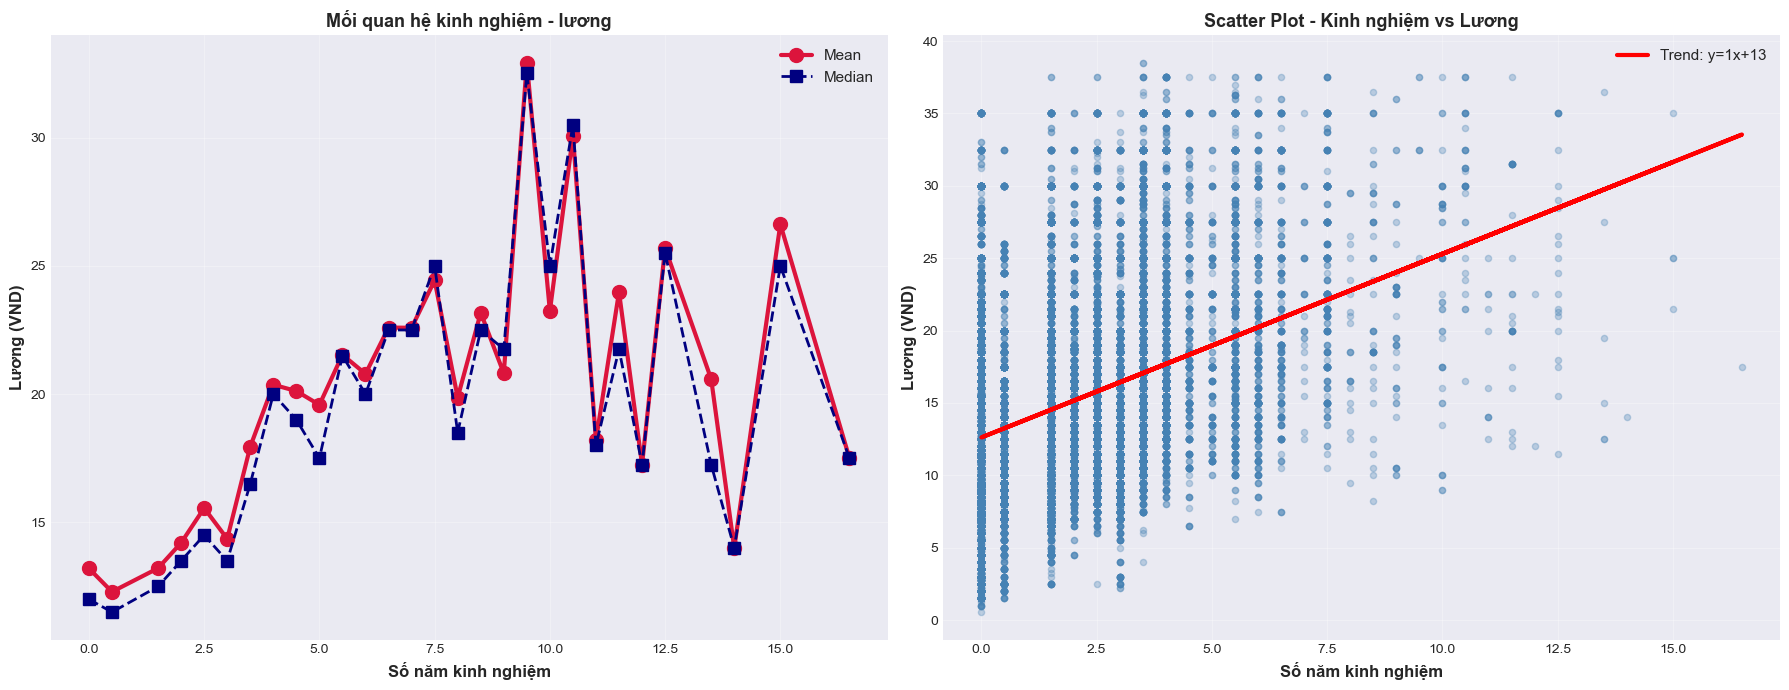

Đã lưu biểu đồ kinh nghiệm vs lương!


In [ ]:
print("\nMối quan hệ giữa kinh nghiệm và lương:")

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Line plot - lương trung bình theo kinh nghiệm
exp_salary = df.groupby('experience_years')['salary_avg_vnd'].agg(['mean', 'median', 'count']).reset_index()

axes[0].plot(exp_salary['experience_years'], exp_salary['mean'], 
             marker='o', linewidth=3, markersize=10, color='crimson', label='Mean')
axes[0].plot(exp_salary['experience_years'], exp_salary['median'], 
             marker='s', linewidth=2, markersize=8, color='navy', label='Median', linestyle='--')
axes[0].set_xlabel('Số năm kinh nghiệm', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Lương (VND)', fontsize=12, fontweight='bold')
axes[0].set_title('Mối quan hệ kinh nghiệm - lương', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

# Scatter plot với regression line
axes[1].scatter(df['experience_years'], df['salary_avg_vnd'], 
                alpha=0.3, s=20, color='steelblue')
z = np.polyfit(df['experience_years'], df['salary_avg_vnd'], 1)
p = np.poly1d(z)
axes[1].plot(df['experience_years'].unique(), p(df['experience_years'].unique()), 
             "r-", linewidth=3, label=f'Trend: y={z[0]:.0f}x+{z[1]:.0f}')
axes[1].set_xlabel('Số năm kinh nghiệm', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Lương (VND)', fontsize=12, fontweight='bold')
axes[1].set_title('Scatter Plot - Kinh nghiệm vs Lương', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('./figures/04_experience_vs_salary.png', dpi=300, bbox_inches='tight')
plt.show()
print("Đã lưu biểu đồ kinh nghiệm vs lương!")

# Phân bổ yêu cầu kinh nghiệm


Phân bổ yêu cầu kinh nghiệm:


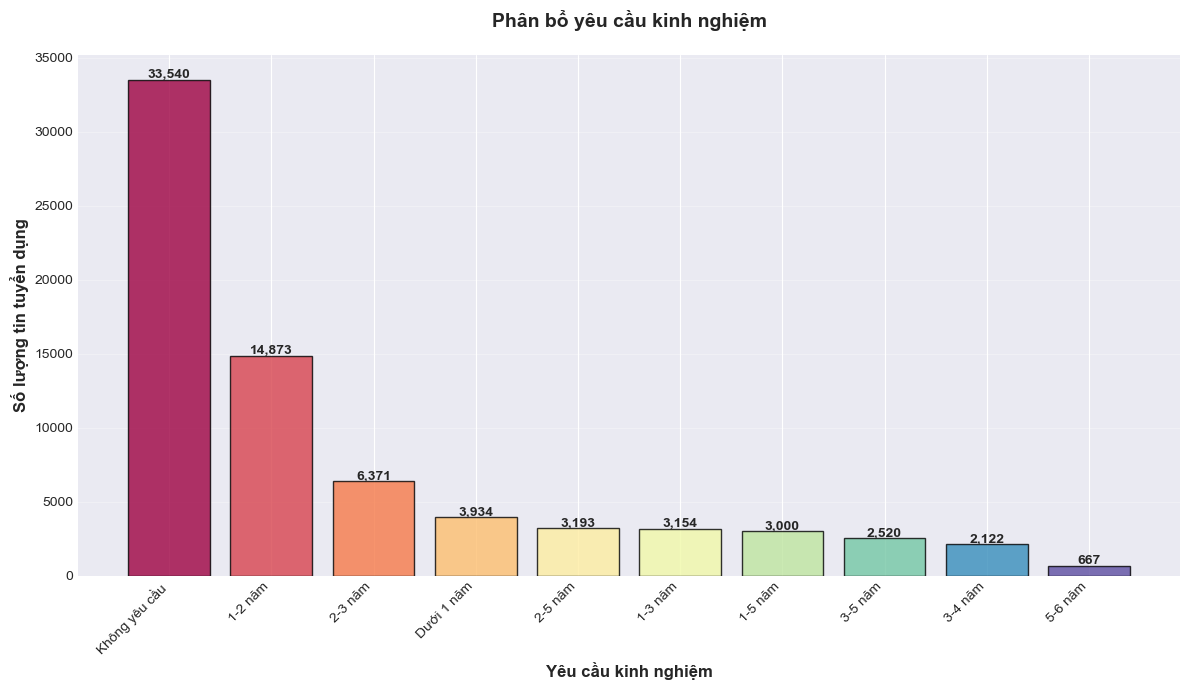

Đã lưu biểu đồ phân bổ kinh nghiệm!


In [ ]:
print("\nPhân bổ yêu cầu kinh nghiệm:")

exp_counts = df['experience'].value_counts().head(10)

plt.figure(figsize=(12, 7))
colors_exp = plt.cm.Spectral(np.linspace(0, 1, len(exp_counts)))
bars = plt.bar(exp_counts.index, exp_counts.values, color=colors_exp, edgecolor='black', alpha=0.8)
plt.xlabel('Yêu cầu kinh nghiệm', fontsize=12, fontweight='bold')
plt.ylabel('Số lượng tin tuyển dụng', fontsize=12, fontweight='bold')
plt.title('Phân bổ yêu cầu kinh nghiệm', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for i, (idx, value) in enumerate(exp_counts.items()):
    plt.text(i, value + 100, f'{value:,}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.legend()
plt.savefig('./figures/04_experience_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Đã lưu biểu đồ phân bổ kinh nghiệm!")

# PHÂN TÍCH MỐI QUAN HỆ ĐA BIẾN

# Heatmap tương quan


Ma trận tương quan:


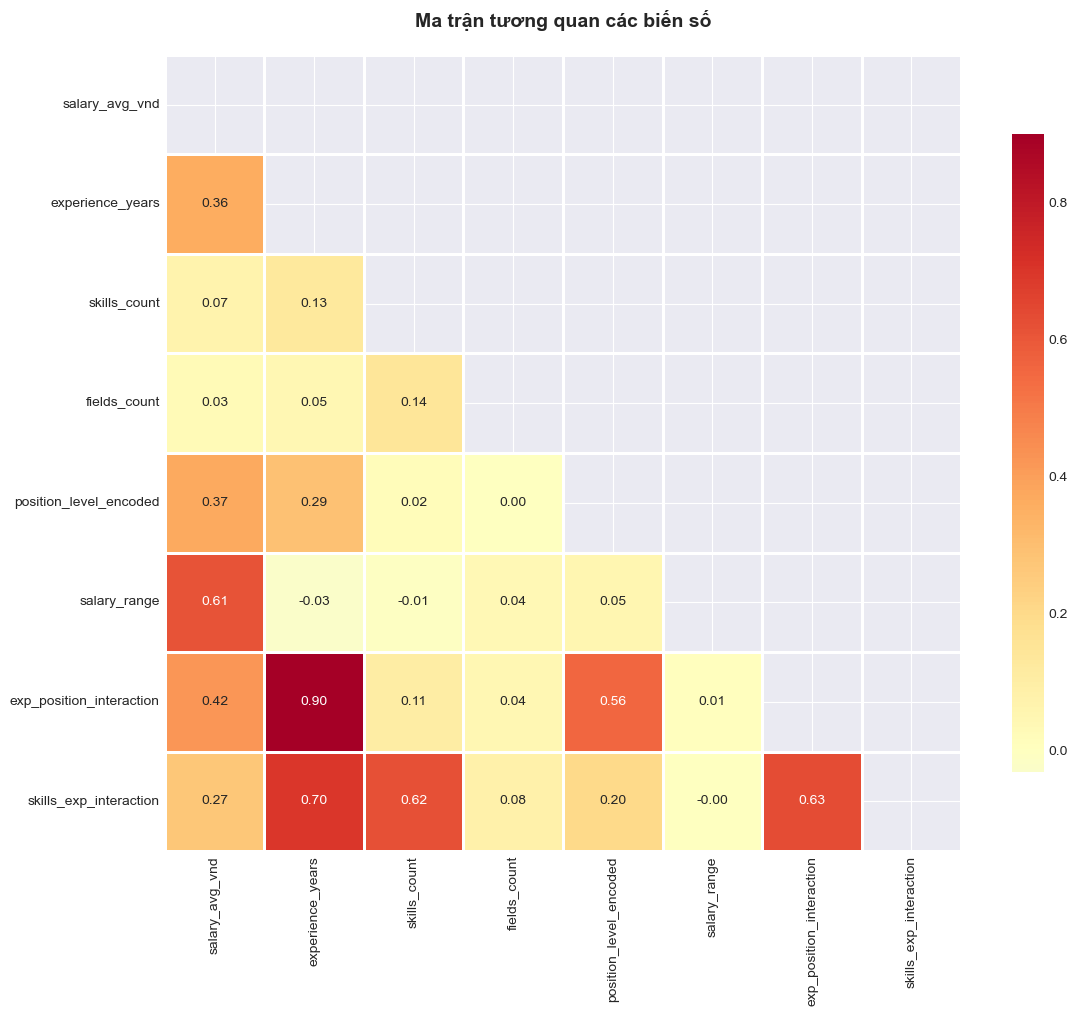

Đã lưu ma trận tương quan!


In [ ]:
print("\nMa trận tương quan:")

important_cols = [
    'salary_avg_vnd', 'experience_years', 'skills_count', 
    'fields_count', 'position_level_encoded', 'salary_range',
    'exp_position_interaction', 'skills_exp_interaction'
]
existing_cols = [col for col in important_cols if col in df.columns]

plt.figure(figsize=(12, 10))
correlation = df[existing_cols].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', 
            cmap='RdYlBu_r', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Ma trận tương quan các biến số', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('./figures/04_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("Đã lưu ma trận tương quan!")

# Bubble chart - Kinh nghiệm vs Lương vs Skills


Bubble chart - 3 biến:


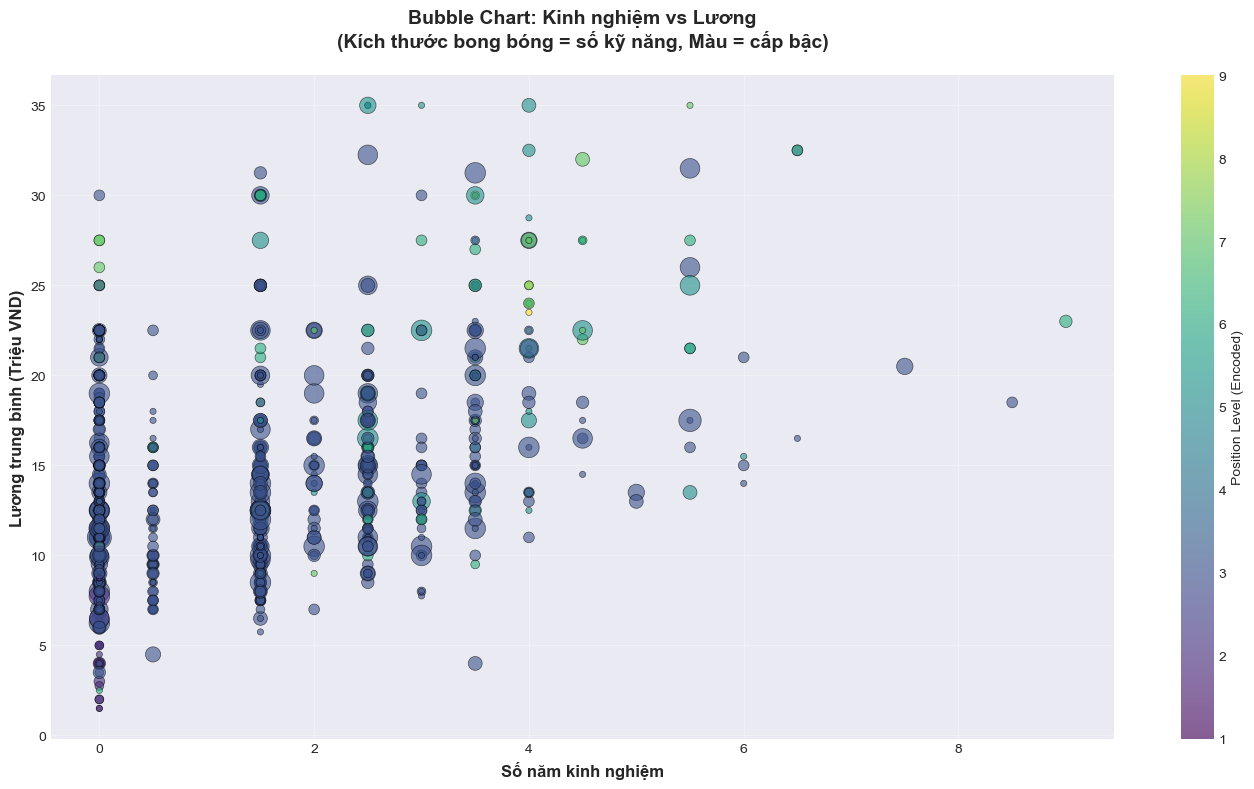

Đã lưu bubble chart!


In [ ]:
print("\nBubble chart - 3 biến:")

# Sample để tránh quá đông
df_sample = df.sample(n=min(1000, len(df)), random_state=42)

plt.figure(figsize=(14, 8))
scatter = plt.scatter(df_sample['experience_years'], 
                     df_sample['salary_avg_vnd'],
                     s=df_sample['skills_count']*20,  # Size ~ skills_count
                     c=df_sample['position_level_encoded'],  # Color ~ position
                     alpha=0.6,
                     cmap='viridis',
                     edgecolors='black',
                     linewidth=0.5)

plt.colorbar(scatter, label='Position Level (Encoded)')
plt.xlabel('Số năm kinh nghiệm', fontsize=12, fontweight='bold')
plt.ylabel('Lương trung bình (Triệu VND)', fontsize=12, fontweight='bold')
plt.title('Bubble Chart: Kinh nghiệm vs Lương\n(Kích thước bong bóng = số kỹ năng, Màu = cấp bậc)', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('./figures/04_bubble_chart.png', dpi=300, bbox_inches='tight')
plt.show()
print("Đã lưu bubble chart!")

# Pair plot (subset)


Pair plot cho các biến quan trọng:


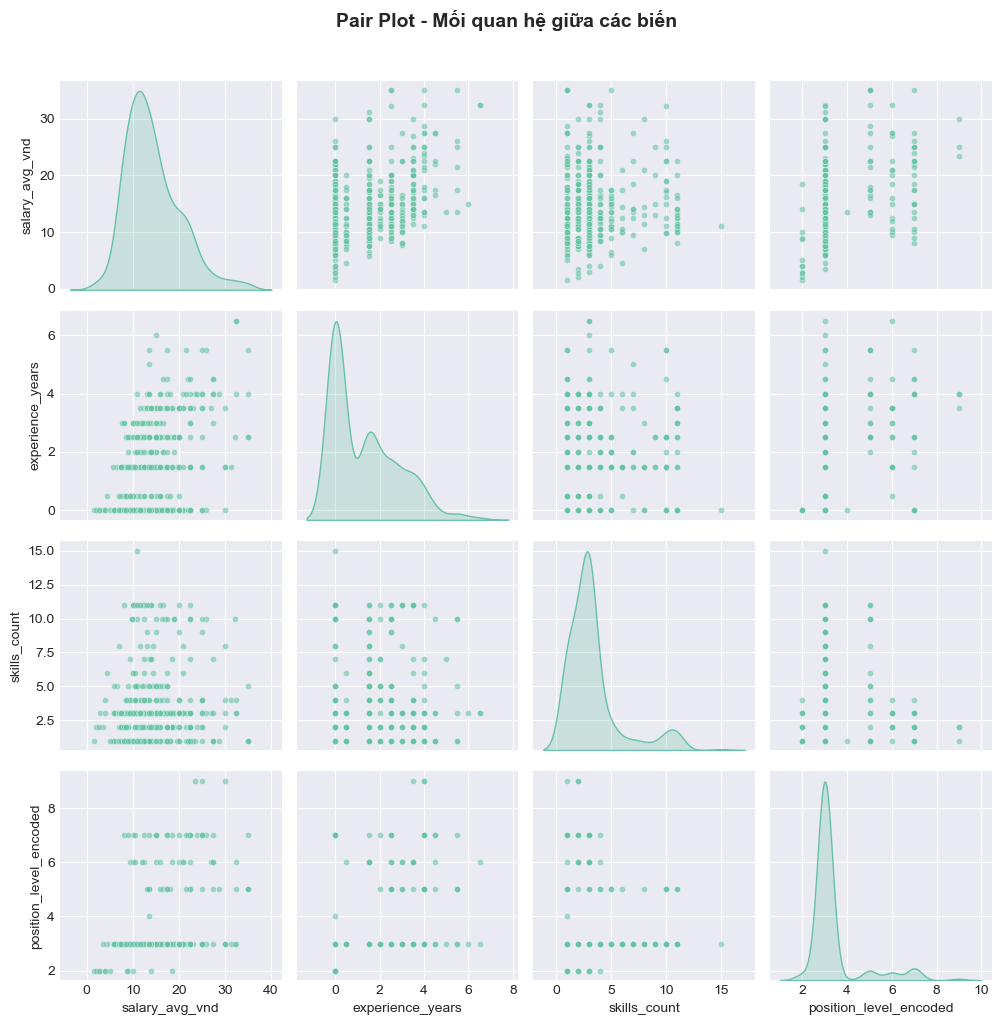

Đã lưu pair plot!


In [ ]:
print("\nPair plot cho các biến quan trọng:")

plot_cols = ['salary_avg_vnd', 'experience_years', 'skills_count', 'position_level_encoded']
existing_plot_cols = [col for col in plot_cols if col in df.columns]

if len(existing_plot_cols) >= 3:
    df_plot = df[existing_plot_cols].sample(n=min(500, len(df)), random_state=42)
    
    pairplot = sns.pairplot(df_plot, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 20})
    pairplot.fig.suptitle('Pair Plot - Mối quan hệ giữa các biến', 
                          fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('./figures/04_pairplot.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Đã lưu pair plot!")

# PHÂN TÍCH THEO NHIỀU CHIỀU

# Lương theo city và position


Heatmap: Lương theo thành phố và cấp bậc:


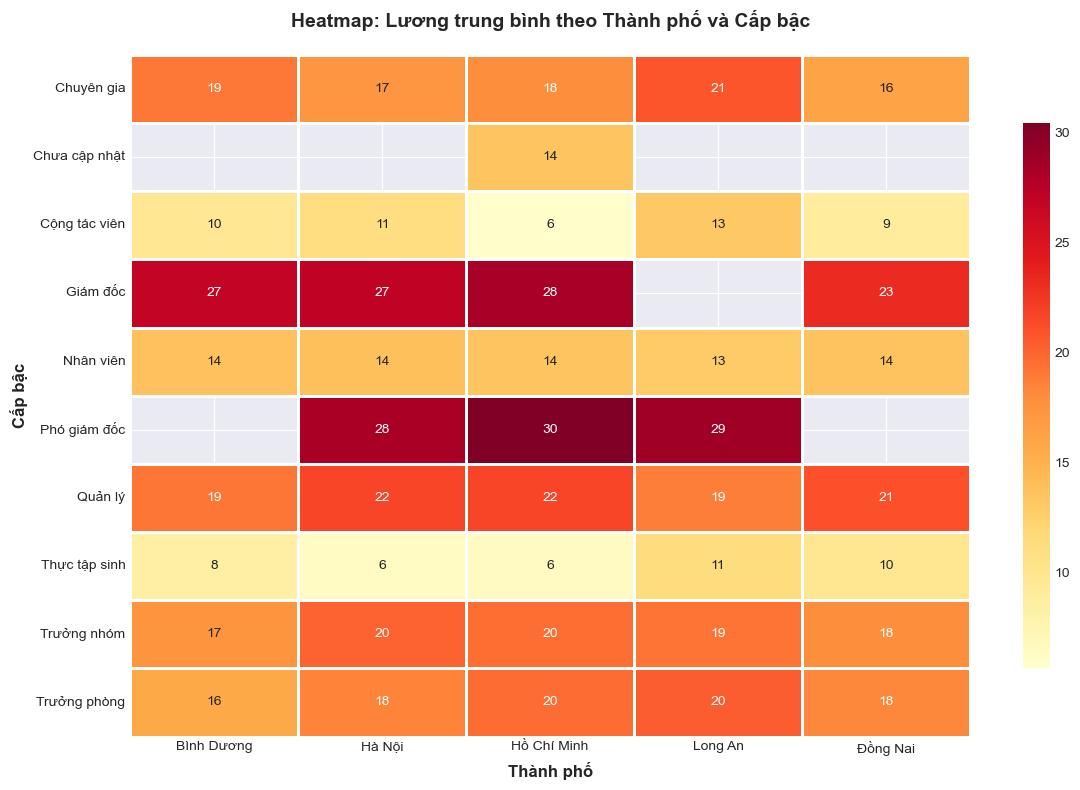

Đã lưu heatmap thành phố - cấp bậc!


In [ ]:
print("\nHeatmap: Lương theo thành phố và cấp bậc:")

top_5_cities = df['city'].value_counts().head(5).index
df_pivot = df[df['city'].isin(top_5_cities)].pivot_table(
    values='salary_avg_vnd',
    index='position_level',
    columns='city',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='YlOrRd', 
            linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Heatmap: Lương trung bình theo Thành phố và Cấp bậc', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Thành phố', fontsize=12, fontweight='bold')
plt.ylabel('Cấp bậc', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('./figures/04_heatmap_city_position.png', dpi=300, bbox_inches='tight')
plt.show()
print("Đã lưu heatmap thành phố - cấp bậc!")

# Grouped bar chart


Grouped bar chart: Lương theo kinh nghiệm và cấp bậc:


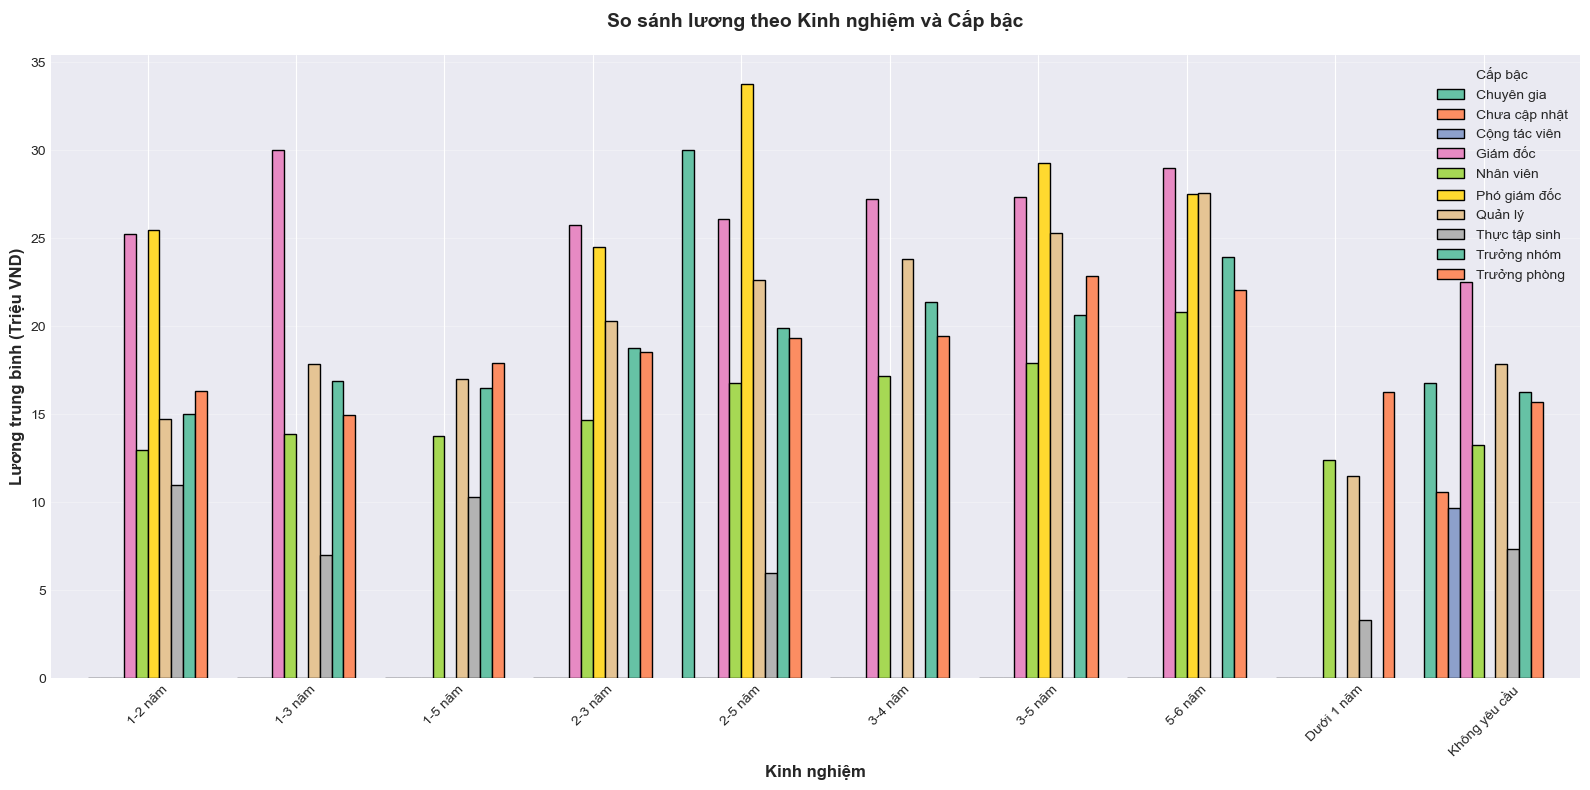

Đã lưu grouped bar chart!


In [ ]:
print("\nGrouped bar chart: Lương theo kinh nghiệm và cấp bậc:")
top_exp = df['experience'].value_counts().head(10).index
df_top = df[df['experience'].isin(top_exp)]
exp_position = df_top.groupby(['experience', 'position_level'])['salary_avg_vnd'].mean().unstack()

fig, ax = plt.subplots(figsize=(16, 8))
exp_position.plot(kind='bar', ax=ax, width=0.8, edgecolor='black')
ax.set_xlabel('Kinh nghiệm', fontsize=12, fontweight='bold')
ax.set_ylabel('Lương trung bình (Triệu VND)', fontsize=12, fontweight='bold')
ax.set_title('So sánh lương theo Kinh nghiệm và Cấp bậc', fontsize=14, fontweight='bold', pad=20)
ax.legend(title='Cấp bậc', fontsize=10)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('./figures/04_grouped_bar_exp_position.png', dpi=300, bbox_inches='tight')
plt.show()
print("Đã lưu grouped bar chart!")

# TÓM TẮT INSIGHTS

In [ ]:
insights = {
    "Phân bổ việc làm": [
        f"Top 3 thành phố: {', '.join(city_counts.head(3).index.tolist())}",
        f"Cấp bậc phổ biến nhất: {position_counts.index[0]} ({position_counts.values[0]:,} tin)",
        f"Lĩnh vực hot nhất: {fields_counts.index[0]} ({fields_counts.values[0]:,} tin)"
    ],
    "Xu hướng lương": [
        f"Lương trung bình: {df['salary_avg_vnd'].mean():,.0f}tr VND",
        f"Lương median: {df['salary_avg_vnd'].median():,.0f}tr VND",
        f"Khoảng lương phổ biến: {df['salary_avg_vnd'].quantile(0.25):,.0f} - {df['salary_avg_vnd'].quantile(0.75):,.0f}tr VND"
    ],
    "Kinh nghiệm": [
        f"Yêu cầu phổ biến: {df['experience'].mode()[0]}",
        f"Tương quan exp-lương: {df[['experience_years', 'salary_avg_vnd']].corr().iloc[0,1]:.2f}",
        f"Mức tăng lương/năm: ~{(df.groupby('experience_years')['salary_avg_vnd'].mean().diff().mean()):,.0f}tr VND"
    ]
}

print("\nKEY INSIGHTS:")
for category, points in insights.items():
    print(f"\n{category}:")
    for point in points:
        print(f"   • {point}")

# Lưu insights
insights_text = []
for category, points in insights.items():
    insights_text.append(f"\n{category}:")
    insights_text.extend([f"   • {p}" for p in points])

with open('../data/processed/visualization_insights.txt', 'w', encoding='utf-8') as f:
    f.write("INSIGHTS TỪ DATA VISUALIZATION\n")
    f.write("="*70 + "\n")
    f.write('\n'.join(insights_text))

print("\nĐã lưu insights vào file!")


KEY INSIGHTS:

Phân bổ việc làm:
   • Top 3 thành phố: Hà Nội, Hồ Chí Minh, Bình Dương
   • Cấp bậc phổ biến nhất: Nhân viên (65,007 tin)
   • Lĩnh vực hot nhất: kinh doanh (21,697 tin)

Xu hướng lương:
   • Lương trung bình: 14tr VND
   • Lương median: 13tr VND
   • Khoảng lương phổ biến: 10 - 18tr VND

Kinh nghiệm:
   • Yêu cầu phổ biến: Không yêu cầu
   • Tương quan exp-lương: 0.36
   • Mức tăng lương/năm: ~0tr VND

Đã lưu insights vào file!
